# WT-Übung 3 - Aufgabe 13

Ein Teilchen verlässt den Ursprung unter dem Einfluss der Gravitationskraft mit einer initialen Geschwindigkeit $v$ und einem zufälligen Winkel $\Phi \in (0; \frac{\pi}{2}]$ gegenüber der horizontalen Achse. Das Teilchen hat eine parabelförmige Trajektorie (ohne Reibung) und erreicht den Grund in einer Entfernung von
$$
    D = \frac{v^2}{g} \sin (2 \Phi)
$$
vom Ursprung. Berechnen Sie die Dichte der Zufallsvariablen $D$ unter der Annahme, dass

* $\Phi$ in seinem Wertebereich, $(0; \frac{\pi}{2}]$, gleichverteilt ist.
* $f_\Phi(\varphi) = \sin(2 \varphi)$ ist.

In [1]:
%matplotlib qt
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

### Trajektorien berechnen

In [2]:
g = 9.81  # m/s²
v = 20.0  # m/s (Beispielwert)

d_max = v**2 / g
h_max = d_max / 2

def distance(phi):
    return d_max * np.sin(2 * phi)

def trajectory(phi):
    d = d_max * np.sin(2*phi)
    x = np.linspace(0, d, int(1000 * d/d_max))
    if d == 0: return x, np.zeros_like(x)
    p = np.poly1d([0, d], True) * -np.tan(phi)/d
    return x, p(x)

Plot der Trajektorie für verschiedene Winkel

In [3]:
fig = plt.figure(figsize=(10, 5), facecolor='w')
plt.xlim([0, d_max]); plt.xlabel("Weite")
plt.ylim([0, h_max]); plt.ylabel("Höhe")
for phi in np.linspace(0, np.pi/2, 11):
    a = distance(phi) / d_max
    plt.plot(*trajectory(phi), color=(1-a,0,a), linewidth=2 if a==1 else 1)
plt.close();  # show later

### Trajektorien

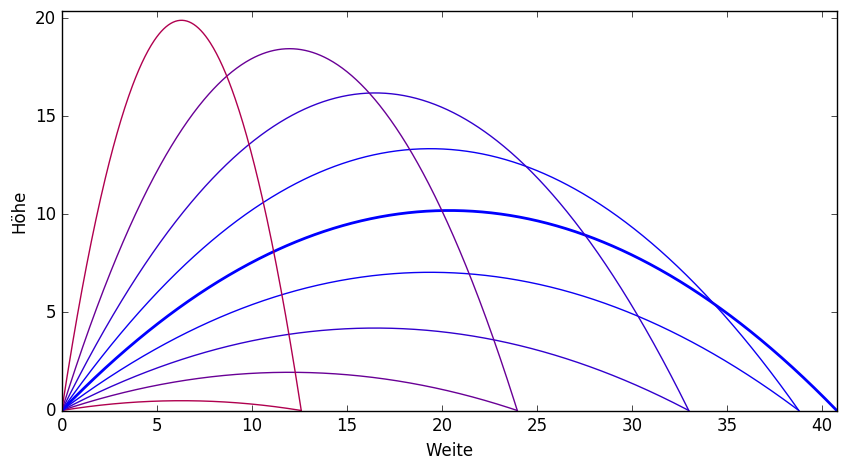

In [4]:
display(fig) 

### Simulation der Wurfweiten

Parameter und anaylitsche Lösungen

In [5]:
num_samples = 100000
num_bins = 30

# Daten für Teilaufgaben
data = [[
    'a',
    #  analytische Lösung
    lambda d: 2 / np.pi / np.sqrt(d_max**2 - d**2),
    # N Realisierungen der ZV Phi
    np.random.uniform(0, np.pi/2, num_samples), 'b'
],
[
    "b",
    # analytische Lösung
    lambda d: d / d_max / np.sqrt(d_max**2 - d**2),
    # N Realisierungen der ZV Phi
    np.arccos(np.random.uniform(-1, 1, num_samples)) / 2, 'r',
]]

Plot vorbereiten

In [6]:
fig = plt.figure(figsize=(9, 5), facecolor='w')
plt.close();  # show later

d_plot = np.linspace(0, d_max, 251)[:-1]

ax = fig.add_axes((0.10, 0.12, 0.88, 0.88))
ax.set_xlim(0, 1)
ax.set_ylim(0, data[0][1](d_plot[-4]))
ax.set_xlabel("rel. Wurfweite d / (v²/g)")
ax.set_ylabel("rel. Haeufigkeit / Dichte");

Berechnung der rel. Häufigkeiten und Plotten der Ergebnisse

In [7]:
for section, f_D, phi_samples, color in data:
    d_samples = distance(phi_samples)
    h_D, bins = np.histogram(d_samples, bins=num_bins, range=(0, d_max), normed=True)

    ax.plot(d_plot / d_max, f_D(d_plot), color, 
            label=section + ") analytisch")
    ax.plot((bins[:-1] + bins[1:]) / 2 / d_max, h_D, color + 'o', ms=5,
            label=section + ") simulation")

ax.legend(loc="upper left");

### Wurfweiten: Simulation vs. analytische Lösung

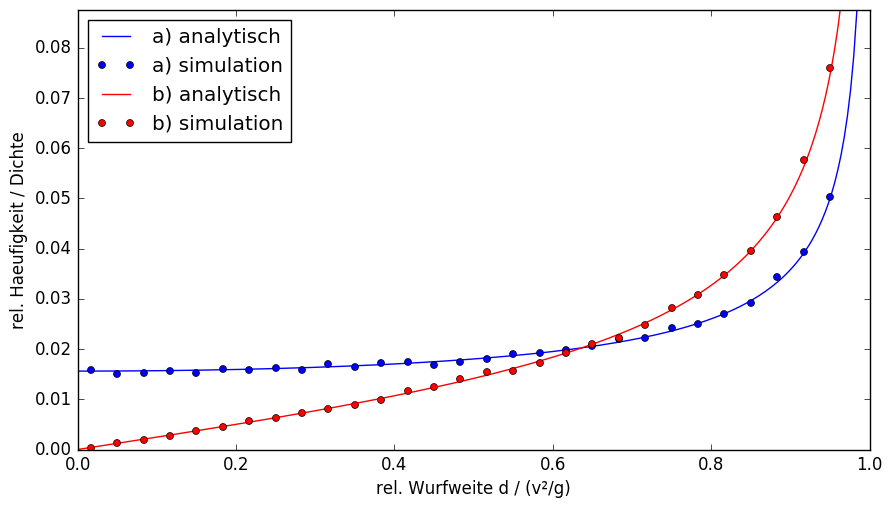

In [8]:
display(fig)